In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
base_df = pd.read_csv("../Data/Processed/merged.csv")
leads_df = pd.read_csv("../Data/Processed/leads.csv")
offers_df = pd.read_csv("../Data/Processed/offers.csv") 

In [3]:
offers_df

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,Not_Specified
1,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,Not_Specified
2,9pl1etry,Corporate Events,Closed Won,2019-12-18,2019-12-18,768.0,2SEMESTERS20OFF,operations,Not_Specified
3,7tkbogep,Corporate Events,Closed Won,2019-11-18,2019-11-18,300.0,MONTH50CUTBACK,operations,Not_Specified
4,locj094j,Corporate Events,Closed Won,2019-11-18,2019-11-19,300.0,MONTH50CUTBACK,quality of delivery,Not_Specified
...,...,...,...,...,...,...,...,...,...
4957,uxztx07y,Corporate Events,Closed Lost,2019-05-20,2019-05-20,0.0,Not_Specified,financial control,no response
4958,ut9flvo3,Corporate Events,Closed Won,2019-05-20,2019-05-20,150.0,QUARTERLY75OFF,operations,Not_Specified
4959,88tre7ve,Corporate Events,Closed Lost,2019-05-20,2019-05-20,768.0,2SEMESTERS20OFF,operations,no response
4960,2d15fo90,Corporate Events,Closed Lost,2019-05-20,2019-05-26,1344.0,Not_Specified,operations,no product fit


In [4]:
# Changing the type of variable of dates fields
offers_df["Created Date"] = pd.to_datetime(offers_df["Created Date"])
offers_df["Close Date"] = pd.to_datetime(offers_df["Close Date"])

In [5]:
offers_df.dtypes

Id                       object
Use Case                 object
Status                   object
Created Date     datetime64[ns]
Close Date       datetime64[ns]
Price                    object
Discount code            object
Pain                     object
Loss Reason              object
dtype: object

In [6]:
# Create a new column to know how many days took the sales process
offers_df["Days"] = offers_df["Close Date"] - offers_df["Created Date"]

In [7]:
# Creating a column to know if there was applied a discount or not
offers_df["Discount"] = offers_df["Discount code"] == "Not_Specified"

# Understanding the data

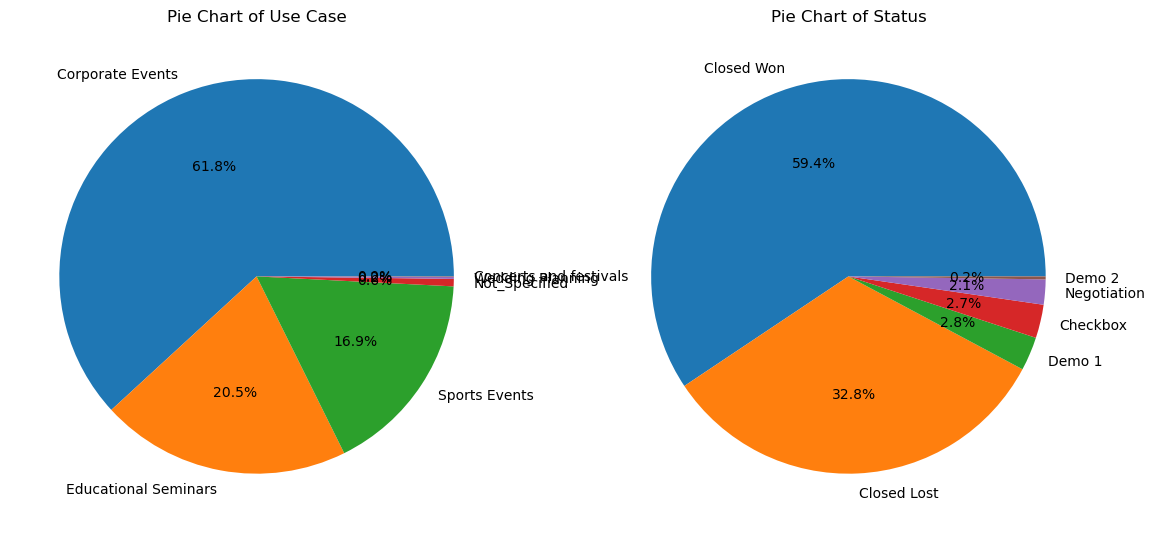

In [8]:

fig, axs = plt.subplots(1, 2, figsize=(14,7)) 

# Pie chart for 'Use Case'
use_case_counts = offers_df['Use Case'].value_counts()
axs[0].pie(use_case_counts, labels = use_case_counts.index, autopct='%1.1f%%')
axs[0].set_title('Pie Chart of Use Case')

# Pie chart for 'Status'
status_counts = offers_df['Status'].value_counts()
axs[1].pie(status_counts, labels = status_counts.index, autopct='%1.1f%%')
axs[1].set_title('Pie Chart of Status')

plt.show()

In [9]:
leads_df

,Id,First Name,Use Case,Source,Status,Discarded/Nurturing Reason,Acquisition Campaign,Created Date,Converted,City
0,23okrabh,Not_Specified,Corporate Events,Inbound,Nurturing,Not Fit,Not_Specified,2018-05-26,0.0,Chicago
1,hbzt0kp1,Alex6 Jackson3,Not_Specified,Inbound,Nurturing,Competitor,Not_Specified,2019-03-29,0.0,Denver
2,velluwdq,Bailey2 Taylor6,Corporate Events,Inbound,Discarded,Not Target,Not_Specified,2018-05-26,0.0,Not_Specified
3,vwm9vcdc,Harper11 Johnson11,Not_Specified,Inbound,Nurturing,Not the right moment,Not_Specified,2019-03-29,0.0,Not_Specified
4,kbfjr4vz,Drew6 Taylor17,Not_Specified,Inbound,Nurturing,Not feeling,Not_Specified,2019-03-29,0.0,Denver
...,...,...,...,...,...,...,...,...,...,...
43967,lpb8obv3,Not_Specified,Corporate Events,Outbound,New,Not_Specified,Digital kit,2020-10-27,0.0,Phoenix
43968,mzcq31rg,Not_Specified,Not_Specified,Outbound,New,Not_Specified,ArtFair,2020-10-27,0.0,Not_Specified
43969,2ajg0z5w,Not_Specified,Corporate Events,Outbound,New,Not_Specified,Not_Specified,2020-10-27,0.0,Not_Specified
43970,k6wq2pi9,Not_Specified,Not_Specified,Outbound,New,Not_Specified,VirtualMeetups,2020-10-27,0.0,Charlotte


In [10]:
leads_df.columns

Index(['Id', 'First Name', 'Use Case', 'Source', 'Status',
       'Discarded/Nurturing Reason', 'Acquisition Campaign', 'Created Date',
       'Converted', 'City'],
      dtype='object')

In [11]:
leads_df.Converted.value_counts()

0.0    40002
1.0     3970
Name: Converted, dtype: int64

# Reducing the leads_df data

In [12]:
# Transforms the converted variable to bool
leads_df.Converted = leads_df.Converted.astype('bool')

# Removing some unnecessary columns for the algorythm like name or reason why was discarded 
# Discarded reason is a value that is given after know that the person was not converted it wont be an input for this model
leads_reduced = leads_df.drop(["First Name", "Discarded/Nurturing Reason"], axis=1)


In [13]:
leads_reduced

,Id,Use Case,Source,Status,Acquisition Campaign,Created Date,Converted,City
0,23okrabh,Corporate Events,Inbound,Nurturing,Not_Specified,2018-05-26,False,Chicago
1,hbzt0kp1,Not_Specified,Inbound,Nurturing,Not_Specified,2019-03-29,False,Denver
2,velluwdq,Corporate Events,Inbound,Discarded,Not_Specified,2018-05-26,False,Not_Specified
3,vwm9vcdc,Not_Specified,Inbound,Nurturing,Not_Specified,2019-03-29,False,Not_Specified
4,kbfjr4vz,Not_Specified,Inbound,Nurturing,Not_Specified,2019-03-29,False,Denver
...,...,...,...,...,...,...,...,...
43967,lpb8obv3,Corporate Events,Outbound,New,Digital kit,2020-10-27,False,Phoenix
43968,mzcq31rg,Not_Specified,Outbound,New,ArtFair,2020-10-27,False,Not_Specified
43969,2ajg0z5w,Corporate Events,Outbound,New,Not_Specified,2020-10-27,False,Not_Specified
43970,k6wq2pi9,Not_Specified,Outbound,New,VirtualMeetups,2020-10-27,False,Charlotte


## One Hot Encoding

In [14]:
leads_reduced["Use Case"].unique()

array(['Corporate Events', 'Not_Specified', 'Educational Seminars',
       'Sports Events', 'Wedding Planning', 'Concerts and festivals'],
      dtype=object)

In [15]:
leads_reduced["Source"].unique()

array(['Inbound', 'Outbound', 'Not_Specified'], dtype=object)

In [16]:
len(leads_reduced["Acquisition Campaign"].unique())

46

In [17]:
offers_df.to_csv("../Data/Processed/offers_enriched.csv", index=False)
leads_df.to_csv("../Data/Processed/leads_enriched.csv", index=False)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from category_encoders import BinaryEncoder, FrequencyEncoder, TargetEncoder


ImportError: cannot import name 'FrequencyEncoder' from 'category_encoders' (/Users/alphalejo/opt/anaconda3/lib/python3.9/site-packages/category_encoders/__init__.py)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Initialize the encoders and the classifier
binary_encoder = BinaryEncoder(cols=['col'])
frequency_encoder = FrequencyEncoder(cols=['col'])
target_encoder = TargetEncoder(cols=['col'])
clf = LogisticRegression()

# List of encoders and their names
encoders = [(binary_encoder, 'Binary'), (frequency_encoder, 'Frequency'), (target_encoder, 'Target')]

for encoder, name in encoders:
    # Fit and transform the training data
    X_train_encoded = encoder.fit_transform(X_train, y_train)
    
    # Transform the test data
    X_test_encoded = encoder.transform(X_test)
    
    # Train the classifier
    clf.fit(X_train_encoded, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test_encoded)
    
    # Calculate the accuracy of the predictions
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{name} Encoding Accuracy: {accuracy}')


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from category_encoders import BinaryEncoder, TargetEncoder

df = leads_df

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Status', axis=1), df['Status'], test_size=0.2, random_state=42)

# Initialize the encoders and the classifier
binary_encoder = BinaryEncoder(cols=['Acquisition Campaign'])
target_encoder = TargetEncoder(cols=['Acquisition Campaign'])
clf = LogisticRegression()

# Frequency encoding
X_train['col_frequency'] = X_train['Acquisition Campaign'].map(X_train['Acquisition Campaign'].value_counts(normalize=True))
X_test['col_frequency'] = X_test['Acquisition Campaign'].map(X_train['Acquisition Campaign'].value_counts(normalize=True))

# List of encoders and their names
encoders = [(binary_encoder, 'Binary'), (None, 'Frequency'), (target_encoder, 'Target')]

for encoder, name in encoders:
    if name != 'Frequency':
        # Fit and transform the training data
        X_train_encoded = encoder.fit_transform(X_train, y_train)
        
        # Transform the test data
        X_test_encoded = encoder.transform(X_test)
    else:
        # For frequency encoding, no need to transform
        X_train_encoded = X_train.copy()
        X_test_encoded = X_test.copy()
    
    # Train the classifier
    clf.fit(X_train_encoded, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test_encoded)
    
    # Calculate the accuracy of the predictions
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{name} Encoding Accuracy: {accuracy}')


ValueError: could not convert string to float: 'kz6hm26p'